<a href="https://colab.research.google.com/github/AaryanAnand10/HR-Analytics/blob/main/HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler

In [2]:
#loading data
df=pd.read_csv("/content/HR-Employee-Attrition.csv",sep=",",encoding="utf-8")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Calculate the percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display missing percentages
missing_data = pd.DataFrame({'Column': missing_percentages.index, 'MissingPercentage': missing_percentages.values})

# Sort the DataFrame by missing percentage in descending order
missing_data.sort_values(by='MissingPercentage', ascending=False)

,Column,MissingPercentage
0,Age,0.0
26,StandardHours,0.0
20,NumCompaniesWorked,0.0
21,Over18,0.0
22,OverTime,0.0
23,PercentSalaryHike,0.0
24,PerformanceRating,0.0
25,RelationshipSatisfaction,0.0
27,StockOptionLevel,0.0
18,MonthlyIncome,0.0


In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [8]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)
df.shape

(1470, 32)

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [11]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [13]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [14]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [15]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [16]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [17]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

<Axes: >

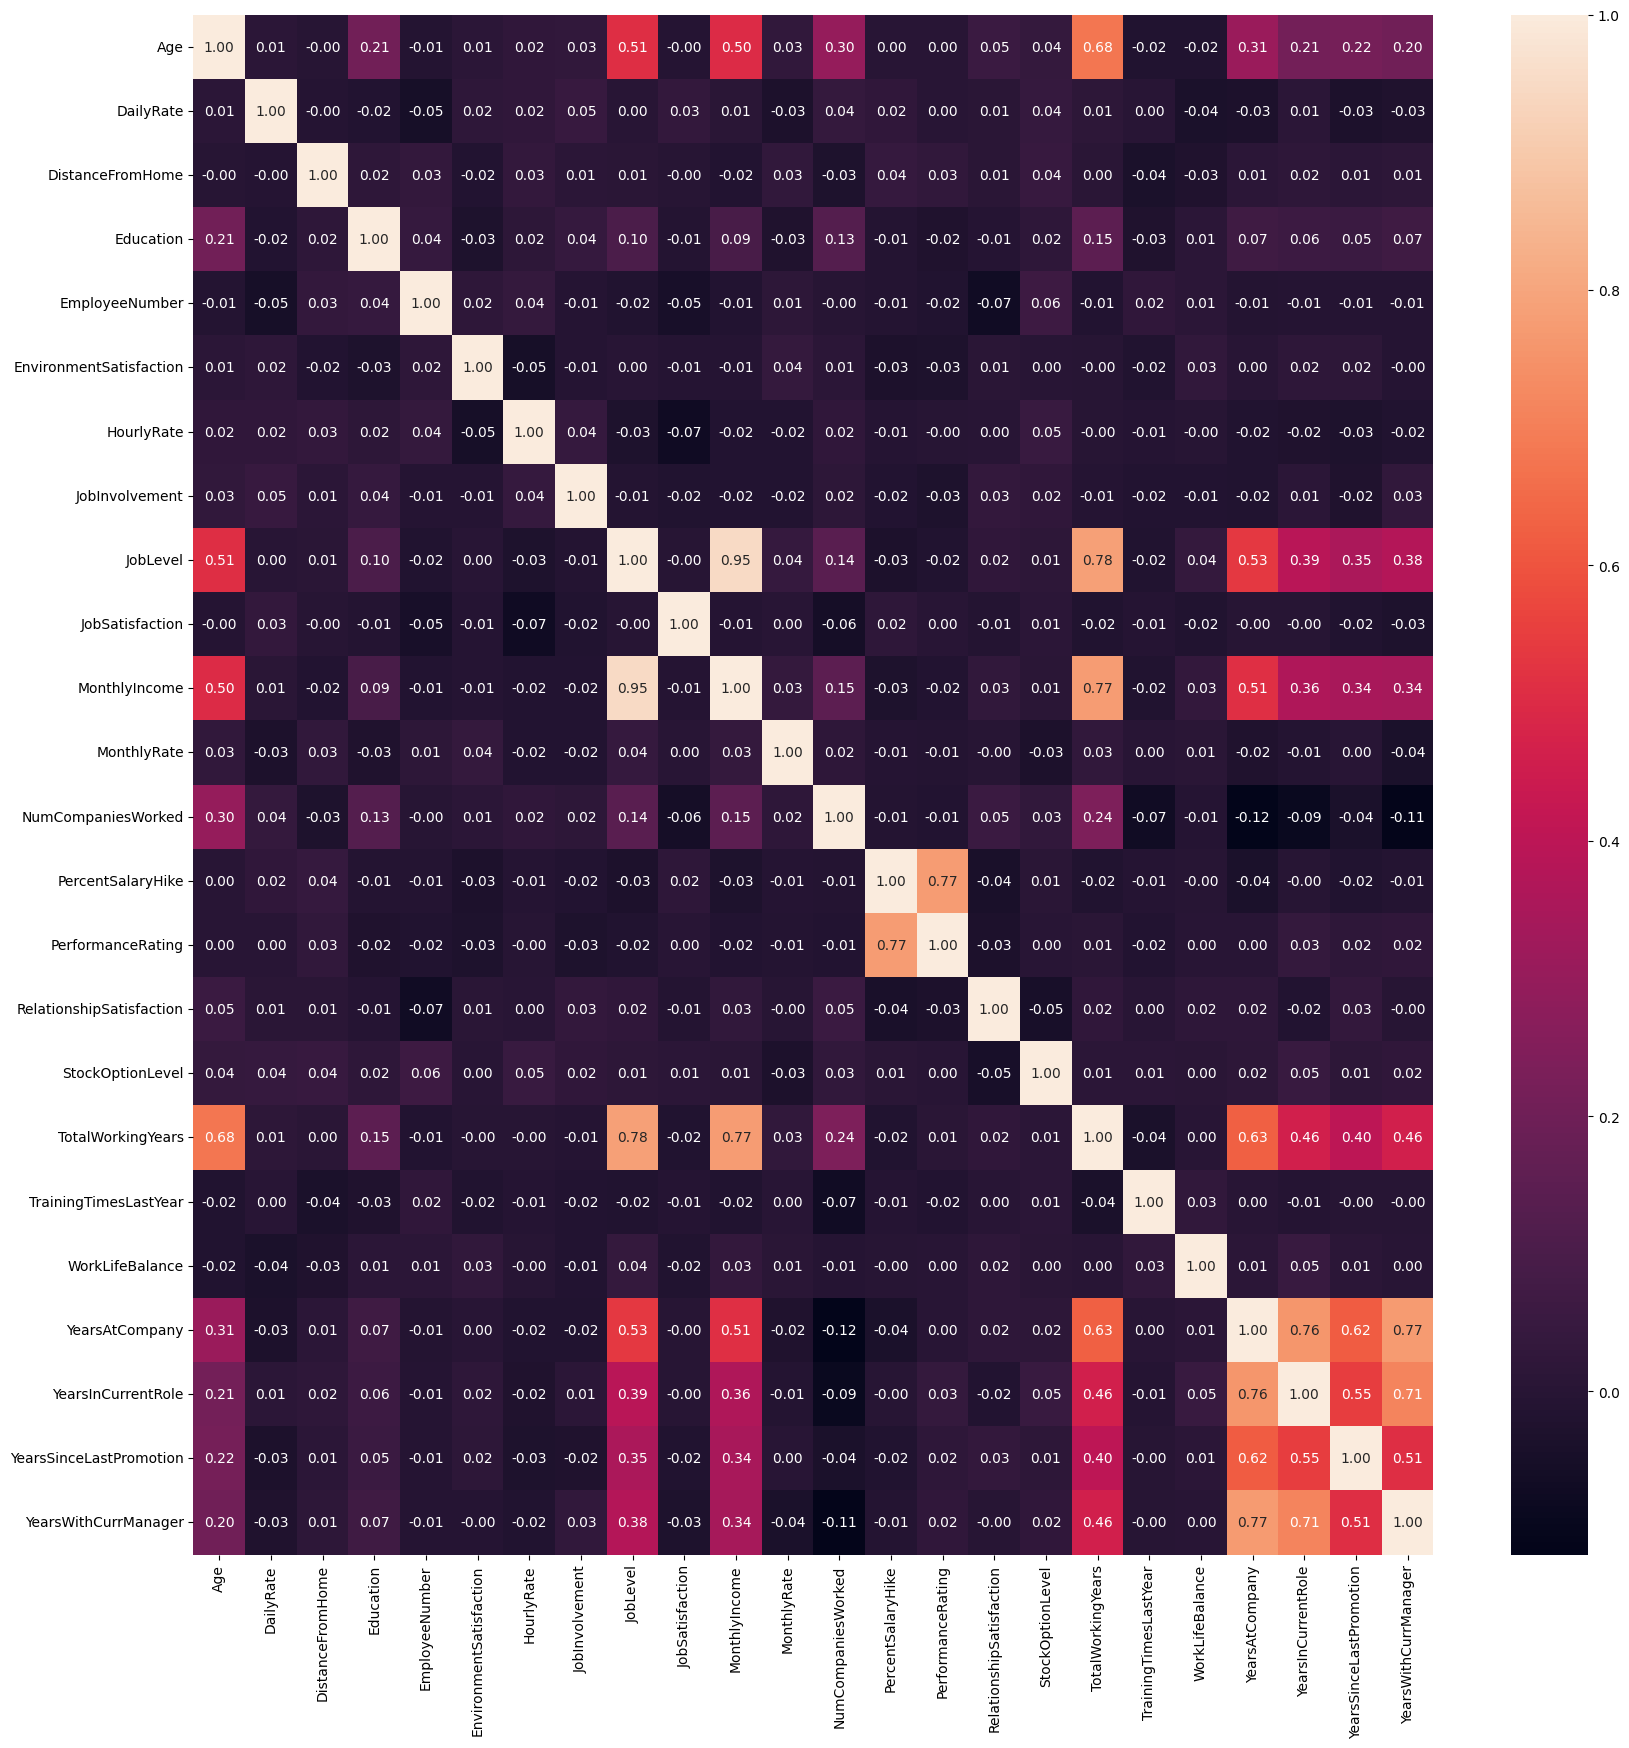

In [18]:
numeric_columns = df.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_columns.corr(), annot=True, fmt='.2f')

In [20]:
G_A=df.groupby(['Gender'])[['Attrition']].value_counts().reset_index()
G_A

,Gender,Attrition,0
0,Female,No,501
1,Female,Yes,87
2,Male,No,732
3,Male,Yes,150


In [21]:
yes_attrition = G_A[G_A['Attrition'] == 'Yes']

plt.figure(figsize=(8, 6))
sns.barplot(data=yes_attrition, x='Gender', y='count', palette='muted')
plt.title('Count of Attrition = Yes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

ValueError: Could not interpret value `count` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

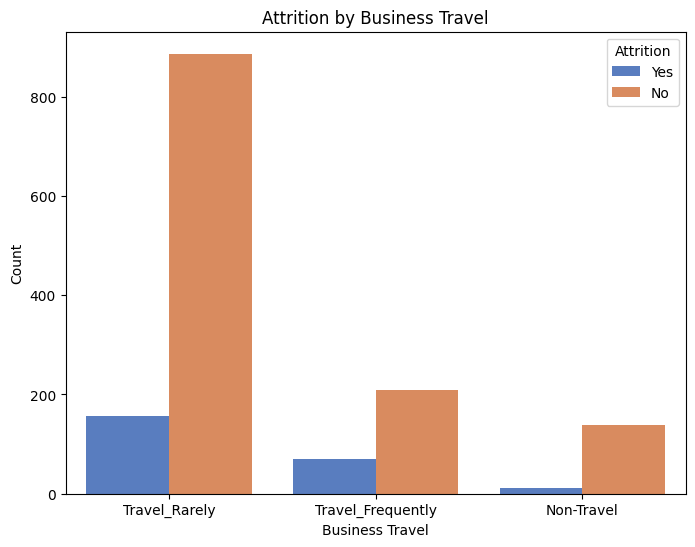

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='BusinessTravel', hue='Attrition', palette='muted')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

<ipython-input-23-162787661336>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette='muted')


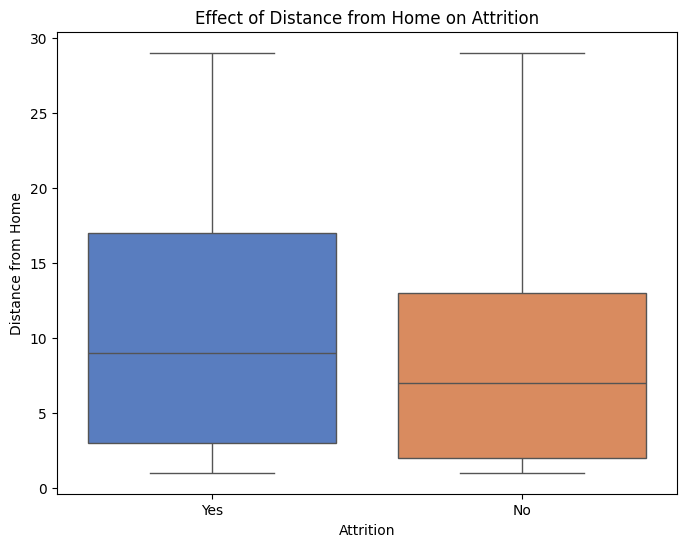

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette='muted')
plt.title('Effect of Distance from Home on Attrition')
plt.xlabel('Attrition')
plt.ylabel('Distance from Home')
plt.show()

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

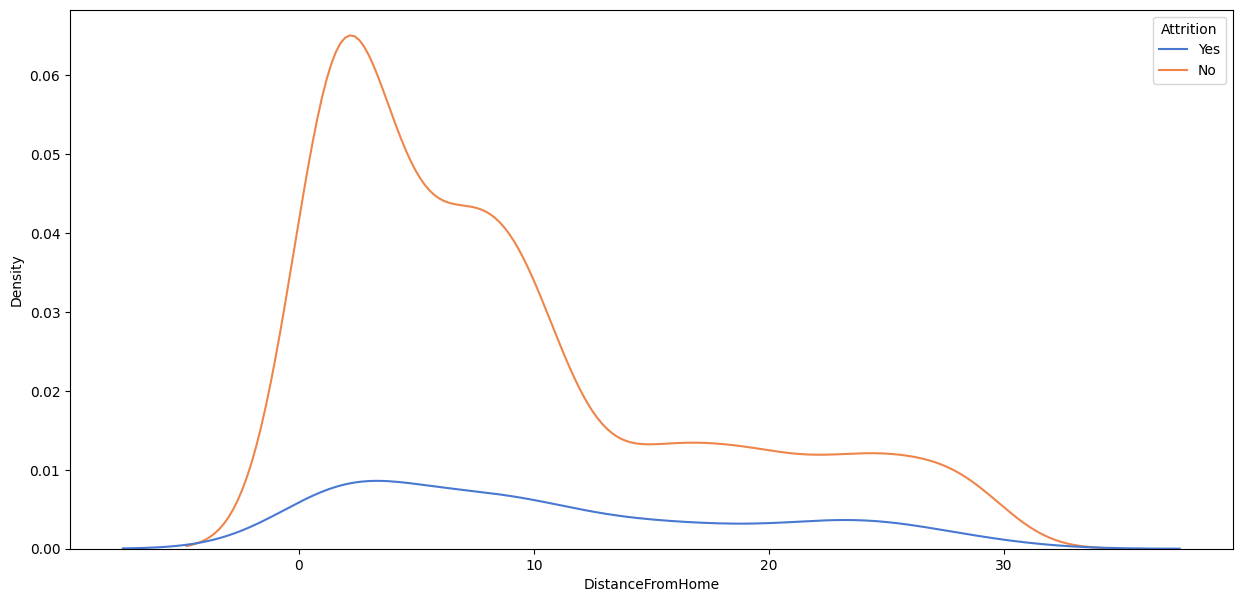

In [24]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=df, x = "DistanceFromHome", hue="Attrition", palette='muted')

In [25]:
# Filter the DataFrame for employees with attrition
attrition_data = df[df['Attrition'] == 'Yes']

# Calculate the count of attritions per department
attrition_by_department = attrition_data['Department'].value_counts()

# Display the department with the most attritions
most_attritions_department = attrition_by_department.idxmax()
attritions_count = attrition_by_department.max()

print(f"The department with the most attritions is '{most_attritions_department}' with {attritions_count} attritions.")

The department with the most attritions is 'Research & Development' with 133 attritions.


In [26]:
fig = px.histogram(attrition_data, x = attrition_data['Department'])
fig.show()

In [27]:
# Calculate the count of attritions per job role
attrition_by_job_role = attrition_data['JobRole'].value_counts()

# Display the job role with the most attritions
most_attritions_job_role = attrition_by_job_role.idxmax()
attritions_count = attrition_by_job_role.max()

print(f"The job role with the most attritions is '{most_attritions_job_role}' with {attritions_count} attritions.")

The job role with the most attritions is 'Laboratory Technician' with 62 attritions.


In [28]:
fig = px.histogram(attrition_data, x = attrition_data['JobRole'])
fig.show()